# Titanic exploratory ML project

In [1]:
# libries needed for the project

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#This cell here enables me to hide the code in case of sending it as a report ot somebody

from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

In [3]:
# loading the data

titanic_train = pd.read_csv("./Data/train.csv")
titanic_test = pd.read_csv("./Data/test.csv")
titanic_gender = pd.read_csv("./Data/gender_submission.csv")

In [4]:
#printing first rows to see how they look in the training set

titanic_train.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [6]:
#taking a look at the test dataset

titanic_test.head(10)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
5,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S
6,898,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q
7,899,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C
9,901,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,NaN,S


In [7]:
titanic_gender.head(10)

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
5,897,0
6,898,1
7,899,0
8,900,1
9,901,0


In [11]:
#count of rows and columns

print(titanic_train.shape)
print("    ")
titanic_train.describe()

# 29 is the average age of the passengers
# we had a passenger as young as 4/5 months
# oldest passenger was 80

(891, 12)
    


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [12]:
# count of survivors
titanic_train['Survived'].value_counts()
# we have more ppl that died than survived

0    549
1    342
Name: Survived, dtype: int64

/home/usuario/miniconda3/envs/projects_env/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


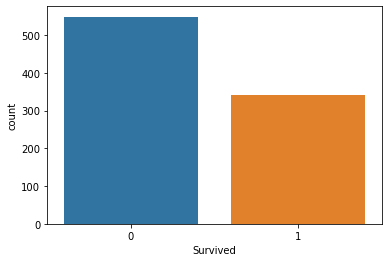

In [13]:
#visualize survivors

survivors = sns.countplot(titanic_train['Survived'])

/home/usuario/miniconda3/envs/projects_env/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/home/usuario/miniconda3/envs/projects_env/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/home/usuario/miniconda3/envs/projects_env/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result 

IndexError: list index out of range

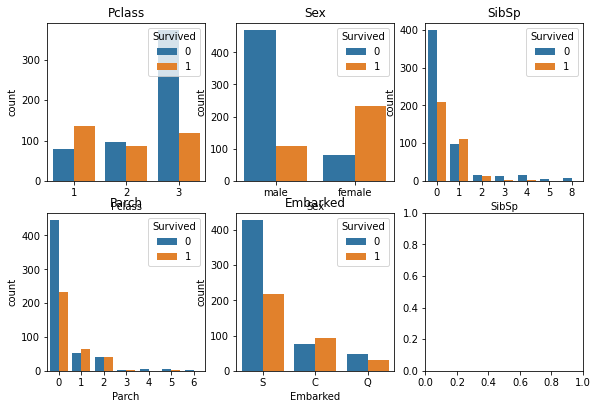

In [14]:
# survivors from   Pclass  Sex Age SibSp Parch  Embarked

cols = ["Pclass", "Sex",  "SibSp", "Parch", "Embarked"]
n_rows = 2
n_cols = 3

#subplot grid and figure sizes of each graph

fig, axs = plt.subplots(n_rows, n_cols, figsize=(n_cols * 3.2, n_rows* 3.2))

for r in range(0, n_rows):
    for c in range(0, n_cols):
        
        i = r*n_cols + c  #index for the number of columns
        ax = axs[r][c] #shows where to position each plot
        sns.countplot(titanic_train[cols[i]], hue=titanic_train['Survived'], ax=ax) #loops through each column
        ax.set_title(cols[i])
        ax.legend(title='Survived', loc='upper right')
        
plt.tight_layout()

In [15]:
#survival rate by sex

titanic_train.groupby('Sex')[['Survived']].mean()

#clearly being a female incresed the chances of survival

,Survived
Sex,
female,0.742038
male,0.188908


In [16]:
#survival rate by sex and class

class_survival = titanic_train.pivot_table('Survived', index='Sex', columns='Pclass')

# We can see that females in first and second class ticket have way more chances of survival than females in 3rd
# In males the chances between second and first are almost the same while, for first class chances inclrease by more than x2

class_survival

Pclass,1,2,3
Sex,,,
female,0.968085,0.921053,0.500000
male,0.368852,0.157407,0.135447


<AxesSubplot:xlabel='Sex'>

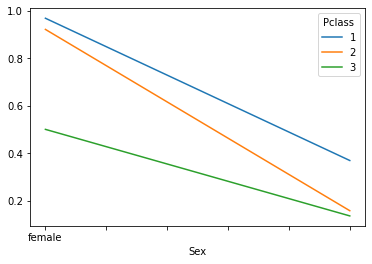

In [17]:
# Lets visualize it 

class_survival.plot()

# It's not showing but males are on the right

<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

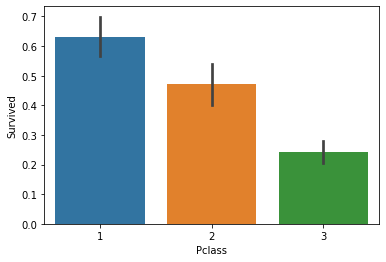

In [18]:
# Survival ratte of each class

sns.barplot(x='Pclass', y='Survived', data=titanic_train)


In [19]:
# Look at survival rate by sex, age and class

age = pd.cut(titanic_train['Age'], [0,18,80])
titanic_train.pivot_table('Survived', ['Sex', age], 'Pclass')

# Older females are more likely to survived, on the other hand if ou are a gronw up in second class you were more likely to not make it
# we would have to check the seond class babies if it is a error or not that it has a 1 

Pclass                  1         2         3
Sex    Age                                   
female (0, 18]   0.909091  1.000000  0.511628
       (18, 80]  0.972973  0.900000  0.423729
male   (0, 18]   0.800000  0.600000  0.215686
       (18, 80]  0.375000  0.071429  0.133663

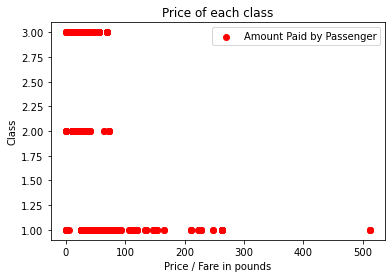

In [20]:
# Plotting the prices paid of each class

plt.scatter(titanic_train['Fare'], titanic_train['Pclass'], color='red', label='Amount Paid by Passenger')
plt.ylabel('Class')
plt.xlabel('Price / Fare in pounds')
plt.title('Price of each class')
plt.legend()
plt.show()


In [21]:
#empt values

titanic_train.isna().sum()

# the cabin column it's of no use since its missing more tha 75% of it's data

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [22]:
# Look at values on each column and getting a count of it

for val in titanic_train:
    print(titanic_train[val].value_counts())
    print()

891    1
293    1
304    1
303    1
302    1
      ..
591    1
590    1
589    1
588    1
1      1
Name: PassengerId, Length: 891, dtype: int64

0    549
1    342
Name: Survived, dtype: int64

3    491
1    216
2    184
Name: Pclass, dtype: int64

Greenberg, Mr. Samuel                               1
Silverthorne, Mr. Spencer Victor                    1
Turpin, Mr. William John Robert                     1
Lundahl, Mr. Johan Svensson                         1
Somerton, Mr. Francis William                       1
                                                   ..
McGowan, Miss. Anna "Annie"                         1
Warren, Mrs. Frank Manley (Anna Sophia Atkinson)    1
Nicholson, Mr. Arthur Ernest                        1
Rice, Master. Eugene                                1
del Carlo, Mr. Sebastiano                           1
Name: Name, Length: 891, dtype: int64

male      577
female    314
Name: Sex, dtype: int64

24.00    30
22.00    27
18.00    26
19.00    25
30.00    25
      

In [23]:
#dropping not usefull columns
titanic = titanic_train.drop(['Cabin', 'PassengerId', 'Name', 'Ticket'], axis=1)

#droppig columns with n/a values
titanic = titanic.dropna(subset = ['Age', 'Embarked'])

In [24]:
# new dataset

titanic.shape


(712, 8)

In [25]:
titanic.dtypes

Survived      int64
Pclass        int64
Sex          object
Age         float64
SibSp         int64
Parch         int64
Fare        float64
Embarked     object
dtype: object

In [26]:
print(titanic['Sex'].unique())
print(titanic['Embarked'].unique())

['male' 'female']
['S' 'C' 'Q']


In [27]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()

#Encoding sex column
titanic.iloc[:,2] = labelencoder.fit_transform(titanic.iloc[:,2].values)

#enconding embarked column
titanic.iloc[:,7] = labelencoder.fit_transform(titanic.iloc[:,7].values)

In [28]:
#Lokking if its encoded correctly

print(titanic['Sex'].unique())
print(titanic['Embarked'].unique())

[1 0]
[2 0 1]


In [29]:
# Splitting the data into independent x and  dependent y

X = titanic.iloc[:,1:8].values
Y = titanic.iloc[:,0].values #survived column

In [30]:
#splitting our data for testing

from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

In [31]:
# Scaling the data to make easier for the model to work on it

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [32]:
# making the ML model

def models(X_train, Y_train):
    # logistic regression
    from sklearn.linear_model import LogisticRegression
    log = LogisticRegression(random_state = 0)
    log.fit(X_train, Y_train)
    
    #Using KNeighbors
    from sklearn.neighbors import KNeighborsClassifier
    knn = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p=2)
    knn.fit(X_train, Y_train)
    
    #Using  SVC(linear kernel)
    from sklearn.svm import SVC
    svc_lin = SVC(kernel='linear', random_state=0)
    svc_lin.fit(X_train, Y_train)
    
    #using SVC( RBF kernel)
    from sklearn.svm import SVC
    svc_rbf = SVC(kernel='rbf', random_state=0)
    svc_rbf.fit(X_train, Y_train)    
    
    #using GaussianRB
    from sklearn.naive_bayes import GaussianNB
    gauss = GaussianNB()
    gauss.fit(X_train, Y_train)
    
    #decision tree
    from sklearn.tree import DecisionTreeClassifier
    tree = DecisionTreeClassifier(criterion= 'entropy', random_state=0)
    tree.fit(X_train, Y_train)
    
    #Random Forest
    from sklearn.ensemble import RandomForestClassifier
    forest = RandomForestClassifier(n_estimators=10, criterion='entropy', random_state=0)
    forest.fit(X_train, Y_train)
    
    #training accuracy for each model
    print('[0]Logistic regression accuracy: ', log.score(X_train, Y_train))
    print('[1]K Neighbors accuracy: ', knn.score(X_train, Y_train))
    print('[2]SVC linear kernel  accuracy: ', svc_lin.score(X_train, Y_train))
    print('[3]SCV RBF accuracy: ', svc_rbf.score(X_train, Y_train))
    print('[4]Gaussian NB accuracy: ', gauss.score(X_train, Y_train))
    print('[5]Decision tree accuracy: ', tree.score(X_train, Y_train))
    print('[6]Random Forest accuracy: ', forest.score(X_train, Y_train))
    
    return log, knn, svc_lin, svc_rbf, gauss, tree, forest
    


In [33]:
# training the models

model = models(X_train, Y_train)

[0]Logistic regression accuracy:  0.7978910369068541
[1]K Neighbors accuracy:  0.8664323374340949
[2]SVC linear kernel  accuracy:  0.7768014059753954
[3]SCV RBF accuracy:  0.8506151142355008
[4]Gaussian NB accuracy:  0.8031634446397188
[5]Decision tree accuracy:  0.9929701230228472
[6]Random Forest accuracy:  0.9753954305799648


In [34]:
# confussion matrix and accuracy for all of the models on test data

from sklearn.metrics import confusion_matrix

for i in range(len(model)):
    cm = confusion_matrix(Y_test, model[i].predict(X_test))
    
    
    #extract the TN, FP, FN, TP
    TN, FP, FN, TP = confusion_matrix(Y_test, model[i].predict(X_test)).ravel()
    test_score = (TP + TN)/ (TP + TN + FN + FP)
    
    
    print(cm)
    print('Model[{}] Testing accuracy = "{}"'.format(i, test_score))
    print(' ')
            

[[75  7]
 [19 42]]
Model[0] Testing accuracy = "0.8181818181818182"
 
[[67 15]
 [20 41]]
Model[1] Testing accuracy = "0.7552447552447552"
 
[[70 12]
 [18 43]]
Model[2] Testing accuracy = "0.7902097902097902"
 
[[75  7]
 [22 39]]
Model[3] Testing accuracy = "0.7972027972027972"
 
[[69 13]
 [27 34]]
Model[4] Testing accuracy = "0.7202797202797203"
 
[[54 28]
 [12 49]]
Model[5] Testing accuracy = "0.7202797202797203"
 
[[73  9]
 [14 47]]
Model[6] Testing accuracy = "0.8391608391608392"
 


In [35]:
# Random forest, position 6 and logistic regression, position 0 are the best model based on our scores

In [36]:
#get feature importance

forest = model[6]
importances = pd.DataFrame({'feature':titanic.iloc[:,1:8].columns, 'importance':np.round(forest.feature_importances_, 3)})
importances = importances.sort_values('importance', ascending=False).set_index('feature')
importances

,importance
feature,
Age,0.300
Fare,0.296
Sex,0.183
Pclass,0.098
SibSp,0.050
Parch,0.044
Embarked,0.030


<AxesSubplot:xlabel='feature'>

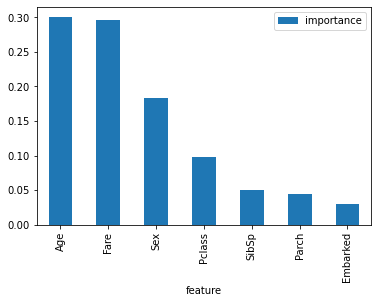

In [37]:
# Importance visualization

importances.plot.bar()

In [40]:
# print prediction of the random forest classifier

pred = model[6].predict(X_test)
print(pred)

print()
#print the actual values
print(Y_test)

#we can see the predictions of our model and below the actual values

[1 0 1 0 0 0 1 0 0 1 1 1 1 0 0 1 0 1 0 0 1 1 1 1 0 0 0 0 0 0 0 0 0 1 1 1 1
 0 0 1 0 0 0 0 0 0 1 0 0 1 1 0 1 0 1 0 0 0 1 1 0 0 0 1 0 0 1 0 1 1 0 1 1 1
 0 0 1 0 0 0 0 1 0 1 1 0 0 0 1 0 0 0 1 1 1 0 1 1 0 0 0 1 0 0 1 0 1 0 0 0 0
 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 1 1 1 1 1 1 0 0 0 0 0 1]

[0 0 1 0 0 0 1 0 0 0 1 1 1 0 0 1 0 1 1 0 0 1 1 1 0 0 0 0 1 0 0 0 0 1 1 0 1
 1 1 1 1 1 0 0 0 0 1 0 0 1 1 0 1 0 0 0 0 0 1 0 0 0 0 1 0 0 1 1 0 1 0 1 1 1
 0 0 1 1 0 0 0 1 1 1 1 0 0 0 1 0 0 0 1 1 1 0 1 1 0 1 0 1 0 0 0 0 1 0 0 0 0
 1 1 1 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 0 0 0 0 0 1]


In [51]:
#I'm going to see if I was passenger my chances of survival, I tried with diferent characteristics



my_survival = [[1, 0, 10, 8, 6, 200, 0 ]]

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
my_survival_scaled = sc.fit_transform(my_survival)

#print prediction with random forest

pred = model[6].predict(my_survival_scaled)
print(pred)

if pred == 0:
    
    print("It sucks to tell you but... you didn't make it")
else:
    print("Atta boy, you made it")
    
# It's really hard to get a survived value


[0]
It sucks to tell you but... you didn't make it
